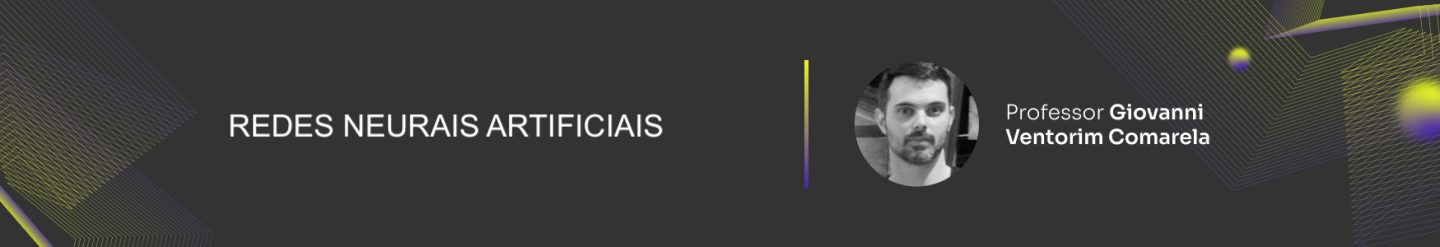

# Laboratório 1

Neste laboratório, vamos aplicar um pouco da teoria e prática que vimos ao longo das duas primeiras semanas da disciplina.

Para isso, vamos utilizar o conjunto de dados [``Fashion MNIST``](https://keras.io/api/datasets/fashion_mnist/).

O conjunto de dados contém imagens de 10 categorias de peças de vestuário.

São 70 mil imagens de tamanho 28x28 (píxeis) em escala de cinza, distribuídas nas 10 categorias.

## Obtenção dos dados

Para obter o conjunto de dados, podemos utilizar a própria biblioteca `Keras`.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow import keras
from keras.datasets import fashion_mnist
sns.set()

In [14]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

Observe que o conjunto de dados já vem dividido em porções de treinamento e teste. Assim, essa é uma etapa com a qual você não vai precisar se preocupar. A seguir, o tamanho de cada porção do conjunto de dados.

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Veja que cada elemento do conjunto de dados é uma matriz com 28 linhas e 28 colunas. Cada matriz representa uma imagem, em escala de cinza, de uma peça de vestuário. São 10 tipos de peças no conjunto de dados, i.e., são 10 classes.

As figuras abaixo apresentam as classes e os tipos de peças de vestuário contidas no conjunto de dados.

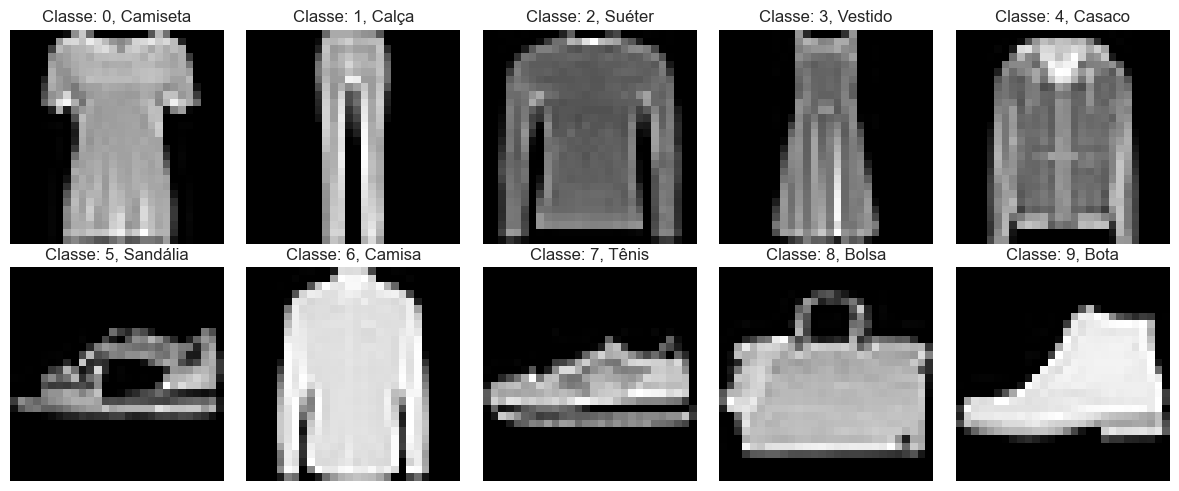

In [16]:
#@title
labels = ["Camiseta", "Calça", "Suéter", "Vestido", "Casaco", "Sandália", "Camisa", "Tênis", "Bolsa", "Bota"]

plt.figure(figsize=(12,5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    img = X_train[y_train == i][3]
    plt.imshow(img, cmap='gray', interpolation='none')
    plt.title("Classe: %d, %s" % (i, labels[i]))
    plt.axis('off')
plt.tight_layout();

**ATENÇÃO:** você não deve remover ou adicionar células no restante deste *notebook*.

Sempre escreva suas respostas nas células indicadas!

## Parte I: Preparação dos Dados [20 pontos - Todos os itens têm o mesmo valor]

### Item 1.1

Cada imagem dos conjuntos de treino e teste é uma matriz 28x28. Como visto na disciplina, MLPs precisam que a entrada seja um vetor, não uma matriz.

Transforme os elementos dos conjuntos de treino e teste em objetos de tamanho 784 (28 * 28 = 784).

**Dica:** use a função [reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html).

In [ ]:
# Escreva sua resposta aqui
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_test = X_test.reshape((X_test.shape[0], 28 * 28))


In [18]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


Antes de continuar, é importante que saída da célula de código acima seja como mostrado na figura abaixo.

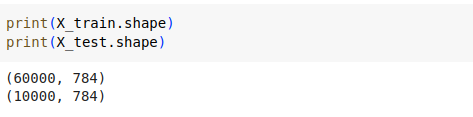

Após isso, é importante converter os dados para ponto flutuante e normalizar os valores. O código abaixo já faz isso para você.

In [19]:
# não modifique aqui.

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

### Item 1.2

Codifique os rótulos do conjunto de treinamento utilizando a codificação *one-hot*. Os rótulos codificados devem ser armazenados em uma variável com nome `y_train_encoded`.

**Dica:** use a classe [CategoryEncoding](https://keras.io/api/layers/preprocessing_layers/categorical/category_encoding/) do `Keras`.

In [ ]:
# Escreva sua resposta aqui
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import CategoryEncoding


num_classes = 10

encoder = CategoryEncoding(num_tokens=num_classes, output_mode="one_hot")

y_train_encoded = encoder(y_train)


## Parte II: Definição, treinamento e avaliação de um modelo simples [40 pontos - Todos os itens têm o mesmo valor]

### Item 2.1

Defina um modelo, em `Keras`, apenas com camada de entrada e uma camada de saída para a tarefa de classificação multiclasse. Como função de ativação na camada de saída, utilize a *softmax*.

In [ ]:
# Escreva sua resposta aqui
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

num_classes = 10

model = Sequential([
    Dense(num_classes, activation='softmax', input_shape=(784,))
])


### Item 2.2

Utilize o método [compile](https://keras.io/api/models/model_training_apis/) para preparar o modelo e definir a função de perda como sendo a Entropia Cruzada Categórica (*Categorical Cross-Entropy*).

In [ ]:
# Escreva sua resposta aqui
model.compile(
    optimizer='adam',                         
    loss='categorical_crossentropy',          
    metrics=['accuracy']                    
)

### Item 2.3

Treine o modelo utilizando o método [fit](https://keras.io/api/models/model_training_apis/). Além dos dados de treinamento, informe:
- `epochs = 100` (veremos o que isso significa na próxima semana);
- verbose = 2 (para você poder acompanhar o andamento do processo de treinamento).

In [ ]:
# Escreva sua resposta aqui
model.fit(
    X_train,           
    y_train_encoded,   
    epochs=100,        
    verbose=2         
)


Epoch 1/100
1875/1875 - 3s - 2ms/step - accuracy: 0.7971 - loss: 0.5998
Epoch 2/100
1875/1875 - 2s - 1ms/step - accuracy: 0.8433 - loss: 0.4607
Epoch 3/100
1875/1875 - 2s - 1ms/step - accuracy: 0.8503 - loss: 0.4361
Epoch 4/100
1875/1875 - 2s - 1ms/step - accuracy: 0.8544 - loss: 0.4225
Epoch 5/100
1875/1875 - 2s - 1ms/step - accuracy: 0.8572 - loss: 0.4139
Epoch 6/100
1875/1875 - 2s - 1ms/step - accuracy: 0.8590 - loss: 0.4071
Epoch 7/100
1875/1875 - 2s - 1ms/step - accuracy: 0.8604 - loss: 0.4023
Epoch 8/100
1875/1875 - 2s - 1ms/step - accuracy: 0.8610 - loss: 0.3988
Epoch 9/100
1875/1875 - 2s - 1ms/step - accuracy: 0.8627 - loss: 0.3948
Epoch 10/100
1875/1875 - 2s - 1ms/step - accuracy: 0.8633 - loss: 0.3925
Epoch 11/100
1875/1875 - 2s - 1ms/step - accuracy: 0.8627 - loss: 0.3895
Epoch 12/100
1875/1875 - 2s - 1ms/step - accuracy: 0.8642 - loss: 0.3879
Epoch 13/100
1875/1875 - 2s - 1ms/step - accuracy: 0.8656 - loss: 0.3858
Epoch 14/100
1875/1875 - 2s - 1ms/step - accuracy: 0.8654 - 

### Item 2.4

Use o método [predict](https://keras.io/api/models/model_training_apis/) para computar a saída do modelo para os elementos do conjuto de teste.

Lembrem, para cada elemento do conjunto de teste, a saída representa as probabilidades do elemento pertencer a cada classe.

In [24]:
# Escreva sua resposta aqui
y_pred_probs = model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step


### Item 2.5

Use o método [argmax](https://numpy.org/doc/2.2/reference/generated/numpy.argmax.html) para identificar o rótulo (predito) mais provável, de acordo com a saída do modelo (Item anterior), para cada elemento do conjunto de teste.

In [25]:
# Escreva sua resposta aqui
y_pred = np.argmax(y_pred_probs, axis=1)

### Item 2.6

Com os rótulos preditos, utilize o método [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) para apresentar diferentes métricas de avaliação do modelo criado no conjunto de teste.

In [26]:
# Escreva sua resposta aqui
from sklearn.metrics import classification_report

labels = ["Camiseta", "Calça", "Suéter", "Vestido", "Casaco", "Sandália", "Camisa", "Tênis", "Bolsa", "Bota"]

report = classification_report(y_test, y_pred, target_names=labels)
print(report)


              precision    recall  f1-score   support

    Camiseta       0.79      0.81      0.80      1000
       Calça       0.98      0.95      0.96      1000
      Suéter       0.75      0.70      0.72      1000
     Vestido       0.82      0.86      0.84      1000
      Casaco       0.68      0.82      0.74      1000
    Sandália       0.94      0.93      0.94      1000
      Camisa       0.63      0.51      0.56      1000
       Tênis       0.93      0.92      0.92      1000
       Bolsa       0.94      0.93      0.93      1000
        Bota       0.94      0.96      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



### Item 2.7

Utilize a classe [ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html), apresente a matriz de confusão dos resultados do classificador no conjunto de teste.
Não deixe de colocar os rótulos/nomes das classes nos eixos X e Y de seu gráfico.

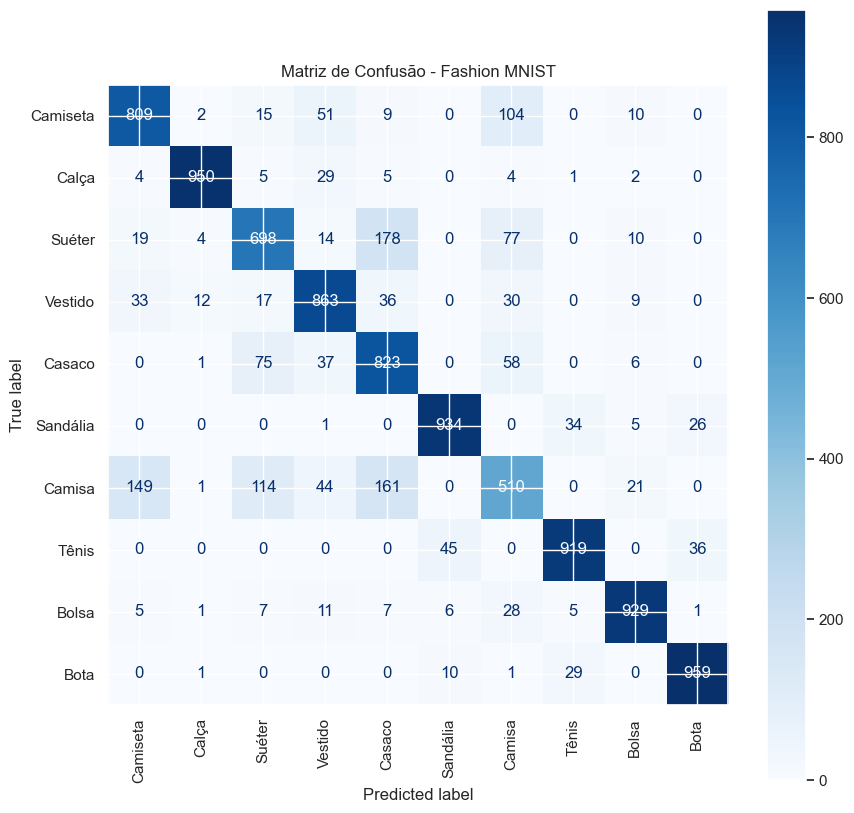

In [ ]:
# Escreva sua resposta aqui
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = ["Camiseta", "Calça", "Suéter", "Vestido", "Casaco", 
          "Sandália", "Camisa", "Tênis", "Bolsa", "Bota"]

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, cmap=plt.cm.Blues, xticks_rotation='vertical')

plt.title("Matriz de Confusão - Fashion MNIST")
plt.show()


## Parte III: Definição, treinamento e avaliação de um modelo mais complexo [20 pontos - Todos os itens têm o mesmo valor]

### Item 3.1

Defina um modelo, em Keras, com uma camada oculta com 128 unidades.
Como função de ativação na camada de saída, utilize a *softmax*.
Como função de ativação na camada oculta, utilize a ReLU.

In [ ]:
# Escreva sua resposta aqui
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),  
    Dense(10, activation='softmax')                   
])

c:\Users\f\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Item 3.2

Repita o Item 2.2, mas agora, para o modelo definido no Item 3.1.

In [ ]:
# Escreva sua resposta aqui
model.compile(
    optimizer='adam',                       
    loss='categorical_crossentropy',       
    metrics=['accuracy']                    
)


### Item 3.3

Repita o Item 2.3, mas agora, para o modelo do Item 3.1.

In [ ]:
# Escreva sua resposta aqui
model.fit(
    X_train,          
    y_train_encoded,  
    epochs=100,       
    verbose=2       
)


Epoch 1/100
1875/1875 - 4s - 2ms/step - accuracy: 0.8253 - loss: 0.4955
Epoch 2/100
1875/1875 - 3s - 2ms/step - accuracy: 0.8636 - loss: 0.3767
Epoch 3/100
1875/1875 - 3s - 2ms/step - accuracy: 0.8779 - loss: 0.3353
Epoch 4/100
1875/1875 - 3s - 2ms/step - accuracy: 0.8852 - loss: 0.3104
Epoch 5/100
1875/1875 - 3s - 2ms/step - accuracy: 0.8923 - loss: 0.2916
Epoch 6/100
1875/1875 - 3s - 2ms/step - accuracy: 0.8971 - loss: 0.2791
Epoch 7/100
1875/1875 - 3s - 2ms/step - accuracy: 0.9011 - loss: 0.2662
Epoch 8/100
1875/1875 - 3s - 2ms/step - accuracy: 0.9056 - loss: 0.2544
Epoch 9/100
1875/1875 - 3s - 2ms/step - accuracy: 0.9088 - loss: 0.2469
Epoch 10/100
1875/1875 - 3s - 2ms/step - accuracy: 0.9106 - loss: 0.2377
Epoch 11/100
1875/1875 - 3s - 2ms/step - accuracy: 0.9153 - loss: 0.2275
Epoch 12/100
1875/1875 - 3s - 2ms/step - accuracy: 0.9165 - loss: 0.2226
Epoch 13/100
1875/1875 - 3s - 2ms/step - accuracy: 0.9199 - loss: 0.2176
Epoch 14/100
1875/1875 - 3s - 1ms/step - accuracy: 0.9230 - 

### Item 3.4

Repita o Item 2.4, mas agora, para o modelo definido no Item 3.1.

In [31]:
# Escreva sua resposta aqui
y_pred_probs = model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step


### Item 3.5

Repita o Item 2.5, mas agora, para o modelo definido no Item 3.1.

In [32]:
# Escreva sua resposta aqui
y_pred = np.argmax(y_pred_probs, axis=1)

### Item 3.6

Repita o Item 2.6, mas agora, para o modelo definido no Item 3.1.

In [33]:
# Escreva sua resposta aqui
from sklearn.metrics import classification_report

labels = ["Camiseta", "Calça", "Suéter", "Vestido", "Casaco", "Sandália", "Camisa", "Tênis", "Bolsa", "Bota"]

report = classification_report(y_test, y_pred, target_names=labels)
print(report)

              precision    recall  f1-score   support

    Camiseta       0.81      0.86      0.84      1000
       Calça       0.99      0.97      0.98      1000
      Suéter       0.82      0.77      0.79      1000
     Vestido       0.91      0.88      0.89      1000
      Casaco       0.77      0.84      0.81      1000
    Sandália       0.97      0.96      0.96      1000
      Camisa       0.73      0.72      0.73      1000
       Tênis       0.94      0.96      0.95      1000
       Bolsa       0.98      0.96      0.97      1000
        Bota       0.96      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



### Item 3.7

Repita o Item 2.7, mas agora, para o modelo definido no Item 3.1.

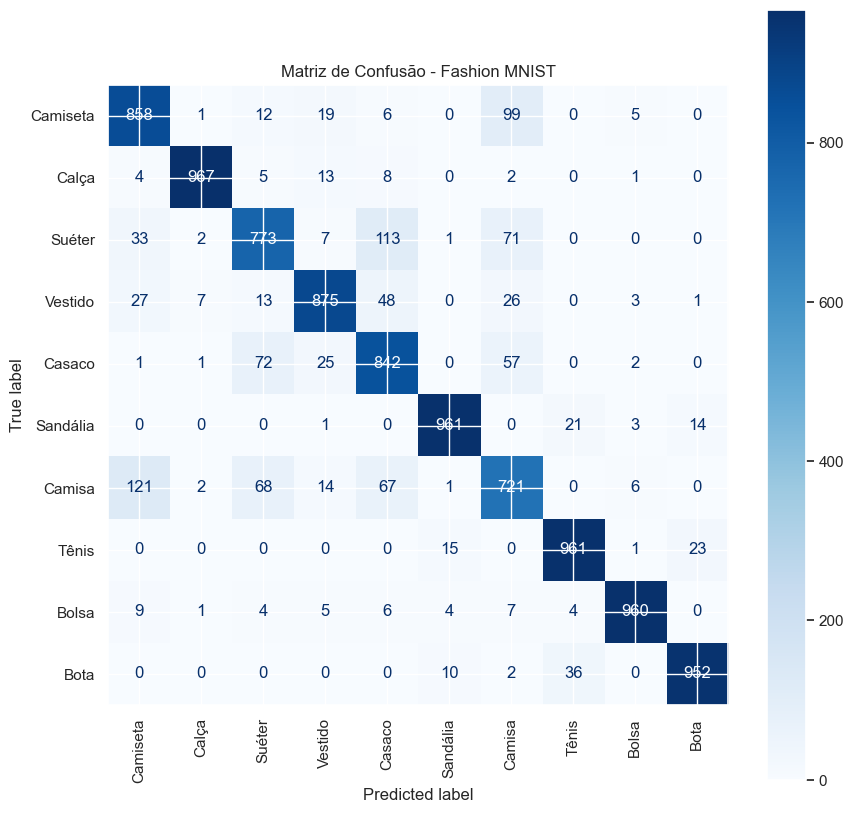

In [ ]:
# Escreva sua resposta aqui
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = ["Camiseta", "Calça", "Suéter", "Vestido", "Casaco", 
          "Sandália", "Camisa", "Tênis", "Bolsa", "Bota"]

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, cmap=plt.cm.Blues, xticks_rotation='vertical')

plt.title("Matriz de Confusão - Fashion MNIST")
plt.show()


## Parte IV: Interpretação [20 pontos - Todos os itens têm o mesmo valor]

### Item 4.1

Com os resultados obtidos, há boa evidência de que o modelo da Parte III é melhor do que o Modelo da Parte II? Justifique sua resposta.

**Escreva sua resposta aqui:** O modelo com camadas ocultas apresentou melhores resultados, isso pode ser visto nas métricas de cada modelo

modelo parte II

              precision    recall  f1-score   support

    Camiseta       0.79      0.81      0.80      1000
       Calça       0.98      0.95      0.96      1000
      Suéter       0.75      0.70      0.72      1000
     Vestido       0.82      0.86      0.84      1000
      Casaco       0.68      0.82      0.74      1000
    Sandália       0.94      0.93      0.94      1000
      Camisa       0.63      0.51      0.56      1000
       Tênis       0.93      0.92      0.92      1000
       Bolsa       0.94      0.93      0.93      1000
        Bota       0.94      0.96      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000


modelo parte III

              precision    recall  f1-score   support

    Camiseta       0.81      0.86      0.84      1000
       Calça       0.99      0.97      0.98      1000
      Suéter       0.82      0.77      0.79      1000
     Vestido       0.91      0.88      0.89      1000
      Casaco       0.77      0.84      0.81      1000
    Sandália       0.97      0.96      0.96      1000
      Camisa       0.73      0.72      0.73      1000
       Tênis       0.94      0.96      0.95      1000
       Bolsa       0.98      0.96      0.97      1000
        Bota       0.96      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000


É possível ver que o modelo da parte III teve uma melhora significativa em todas as métricas

### Item 4.2

Observe "com calma" a matriz de confusão. Existe algum padrão nos erros mais comuns? Há alguma justificativa intuitiva para os erros mais comuns ou os erros são puramente aleatórios?

**Escreva sua resposta aqui:** Observando os resultados, é possível notar que a maior parte dos erros são pra classificar coisas tipo camisas, o modelo tem dificuldade de diferenciar camisas, camisetas, casacos e sueters